In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [2]:
# Our dataset is a 1-D dataset : 
df = pd.read_csv('Salary_dataset.csv')

# We will predict the salary of a person based on their Experience

# 1. Data Preprocessing

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


Dropping the extra serial number coloumn

In [4]:
#we do not require the Unnamed:0 coloumn as it is the copy of the serial numbers
df = pd.read_csv('Salary_dataset.csv',usecols=['YearsExperience','Salary'])

In [5]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


We do not have any missing values in the dataset.

In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


No abnormalities in our dataset.

In [8]:
df.duplicated().sum()

0

No duplicated data present.

# 2. Building our Simple Linear Regression Model

In [9]:
X = df.iloc[:,0].values
X

array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.3,  3.8,  4. ,
        4.1,  4.1,  4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,
        8. ,  8.3,  8.8,  9.1,  9.6,  9.7, 10.4, 10.6])

In [10]:
y = df.iloc[:,-1].values
y

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

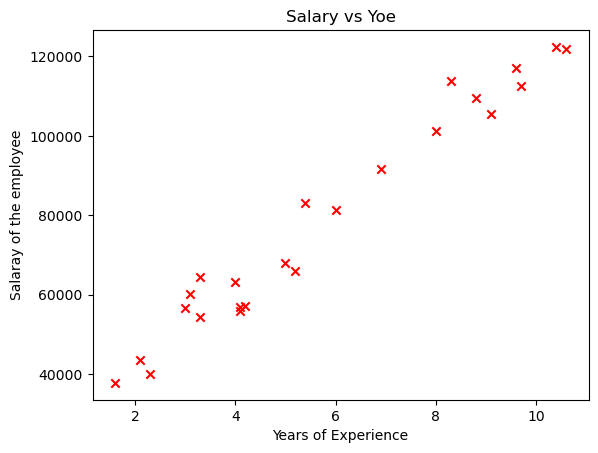

In [12]:
# Visualising our data

plt.scatter(X_train, y_train, marker='x', c='r') 

plt.title("Salary vs Yoe")
plt.ylabel('Salaray of the employee')
plt.xlabel('Years of Experience')
plt.show()

We can observe that our data follows a linear line, So we can definitely try linear regression here.

In [13]:
# We will define our cost function

def cost_fn(X,y,w,b):
    
    total_cost = 0 
    m = X.shape[0] #getting the number of examples

    curr_cost = 0
    for i in range(m):
        
        yhat = w*X[i] + b # our prediction yhat
        curr_cost += (yhat-y[i])**2 # squared error cost

    total_cost = curr_cost/(2*m) #squared error cost function

    return total_cost

In [14]:
#We will define the function to get the gradeints dJ/dw and dJ/db
def find_grad(X,y,w,b):

    dj_dw = 0
    dj_db = 0
    m = X.shape[0]

    for i in range(m):
        yhat = w*X[i] + b
        dj_db += yhat - y[i]
        dj_dw += (yhat-y[i])*X[i]

    dj_dw  = dj_dw/m
    dj_db = dj_db/m

    return dj_dw,dj_db

    

In [15]:
#We will now learn and find the parameters w and b using Batch Gradient Descent

def gradient_descent(X, y, w_initial, b_initial, cost_function, computing_gradient, alpha, num_iterations):

    m = len(X)

    # #storing costs and w value every few steps (for graphing)
    # J_vals = []
    # w_vals = []
    
    w = copy.deepcopy(w_initial)
    b = b_initial

    for i in range(num_iterations):

        dj_dw,dj_db = computing_gradient(X,y,w,b)

        #update step in gradient descent
        w = w - alpha*dj_dw
        b = b - alpha*dj_db

        cost = cost_function(X,y,w,b)
        # J_vals.append(cost)
        # w_vals.append(w)

        #printing cost every few iterations(10% of total iters) to see if batch GD is working or not
        if num_iterations < 10 or i%max(1,num_iterations//10) == 0:
            print(f"Iteration no. {i+1:4}: Cost {cost:8.2f}")

    return w, b

In [16]:
# Let us test our Linear Regression
w_initial = 0.
b_initial = 0.

num_iterations = 1000
alpha = 0.01

w,b = gradient_descent(X_train,y_train,w_initial,b_initial,cost_fn,find_grad,alpha,num_iterations)

Iteration no.    1: Cost 1207735439.71
Iteration no.  101: Cost 43833281.27
Iteration no.  201: Cost 34099355.18
Iteration no.  301: Cost 27434507.76
Iteration no.  401: Cost 22871067.42
Iteration no.  501: Cost 19746466.60
Iteration no.  601: Cost 17607043.35
Iteration no.  701: Cost 16142174.06
Iteration no.  801: Cost 15139173.80
Iteration no.  901: Cost 14452416.62


We can observe that the cost is not minimizing after some iterations, the reason for this is that the data is not normalized

Y_train has values ranging from 40000 to 100000+, this causes the algorithim to behave differently.

We will now Normalize our data and check the results

In [17]:
# Normalizing our dataset 
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)
y_train_norm = (y_train - y_mean) / y_std

# Let us test our Linear Regression
w_initial = 0.
b_initial = 0.

num_iterations = 1000
alpha = 0.01

w,b = gradient_descent(X_train_norm,y_train_norm,w_initial,b_initial,cost_fn,find_grad,alpha,num_iterations)

Iteration no.    1: Cost     0.49
Iteration no.  101: Cost     0.08
Iteration no.  201: Cost     0.03
Iteration no.  301: Cost     0.02
Iteration no.  401: Cost     0.02
Iteration no.  501: Cost     0.02
Iteration no.  601: Cost     0.02
Iteration no.  701: Cost     0.02
Iteration no.  801: Cost     0.02
Iteration no.  901: Cost     0.02


In [18]:
m = X_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X_train_norm[i] + b

Text(0, 0.5, 'Salary')

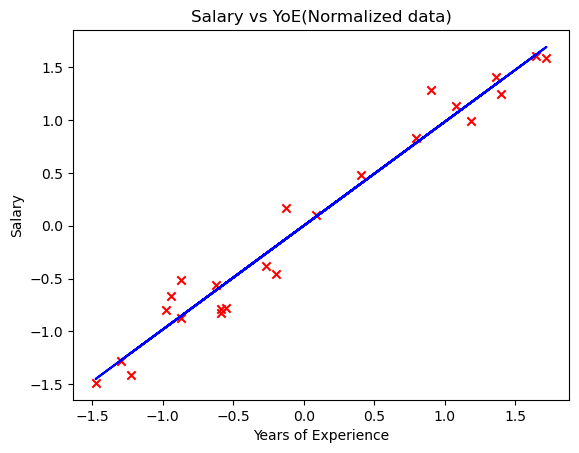

In [19]:
#Plotting the linear fit
plt.plot(X_train_norm,predicted,c="b")

#scatter plot of the data
plt.scatter(X_train_norm,y_train_norm,marker='x',c="r")

plt.title("Salary vs YoE(Normalized data)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")


Converting the normalized coefficients to actual data coefficients 

Text(0, 0.5, 'Salary')

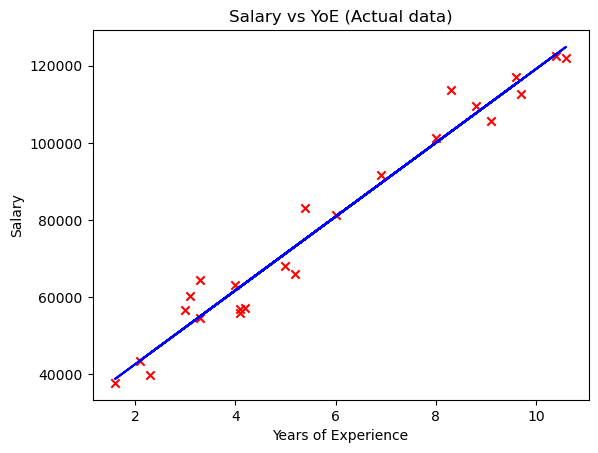

In [20]:
X_mean = np.mean(X_train)
X_std = np.std(X_train)

y_mean = np.mean(y_train)
y_std = np.std(y_train)

w_actual = w * (y_std / X_std)
b_actual = (-w * X_mean / X_std * y_std) + (b * y_std) + y_mean

m = X_train.shape[0]
predicted_actual = np.zeros(m)

for i in range(m):
    predicted_actual[i] = w_actual * X_train[i] + b_actual

#Plotting the linear fit
plt.plot(X_train,predicted_actual,c="b")

#scatter plot of the data
plt.scatter(X_train,y_train,marker='x',c="r")

plt.title("Salary vs YoE (Actual data)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
